<a href="https://colab.research.google.com/github/DianaKahar/Data-Science-Project-2/blob/main/Project_2_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 2 DATA SCIENCE

**Import Necessary Libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

**INTRODUCTION**

Online learning has become an popular platform for learning, providing accessible and diverse opportunities for learners everywhere. There are a vast variety of online learning platform such as coursera, Udemy, edX, LinkedIn Learning, canvas and many more. Udemy is one of the largest online learning platforms. Founded 13 years ago in 2010, it has evolved into a diverse marketplace connecting instructors with students providing an extensive range of subject and courses.

The analysis dives through the Udemy datase and explores various aspects of its courses which includes subjects, pricing, popularity and trends over the years. The purpose of this analysis is to gain valueble insight into the dynamics of Udemy course offeings, understand the learners preference and identify potential areas of improvements.

Examining factors such as course subjects, levels, pricing and subscriber engagement, we aim to provide a comprehensive overview of Udemy learning landscape. As we go through the analysis, we will be be able to uncover patterns, highlight key trends and offer valuble insight that ables us to contribute a deeper understanding of online learning dynamics on the platform.

**Load and Read Data**

In [6]:
url = "https://raw.githubusercontent.com/DianaKahar/Data-Science-Project-2/main/udemy_courses.csv"
df = pd.read_csv(url)
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


**PROBLEM STATEMENT**

While Udemy offers a vast range of course with various subjects and skill level, its important to understand the patterns and trends that can shed light on the factors contributing to the success and challenges of these courses. Inquiries emerge about the impact of course pricing, the distribution of subjects and the correlationg between course level and number of subscribers.



Problem statements are:

a) What are the most popular subjects subscribed on Udemy?

b) How does pricing influence the number of subscribers?

c) Is there a difference between levels of learners and the subjects?

d) What is the trend for number of subscribers over the years?

e) What are the contrast between paid subscribers and not?


By addressing these questions, Udemy can enhance its platform's user experience, optimize its course offerings and stay competitive in the rapid evolving online education landscape.

**Data Cleaning and Preparation**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [9]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['published_timestamp'])

In [11]:
df.drop(['course_id', 'url', 'published_timestamp'], axis = 1, inplace = True)
df.sample()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
415,Coaching Course:Investment Analysis for your c...,True,200,1,0,6,Intermediate Level,0.566667,Business Finance,2017-06-23 16:35:04+00:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   course_title      3678 non-null   object             
 1   is_paid           3678 non-null   bool               
 2   price             3678 non-null   int64              
 3   num_subscribers   3678 non-null   int64              
 4   num_reviews       3678 non-null   int64              
 5   num_lectures      3678 non-null   int64              
 6   level             3678 non-null   object             
 7   content_duration  3678 non-null   float64            
 8   subject           3678 non-null   object             
 9   date              3678 non-null   datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 262.3+ KB


In [13]:
df.duplicated().sum()

6

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().any(), df.duplicated().sum()

(False, 0)

In [16]:
df['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [17]:
dfsub = df.groupby(['subject', 'level'], as_index = False). count()
dfsub

,subject,level,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,date
0,Business Finance,All Levels,693,693,693,693,693,693,693,693
1,Business Finance,Beginner Level,339,339,339,339,339,339,339,339
2,Business Finance,Expert Level,31,31,31,31,31,31,31,31
3,Business Finance,Intermediate Level,128,128,128,128,128,128,128,128
4,Graphic Design,All Levels,298,298,298,298,298,298,298,298
5,Graphic Design,Beginner Level,242,242,242,242,242,242,242,242
6,Graphic Design,Expert Level,5,5,5,5,5,5,5,5
7,Graphic Design,Intermediate Level,57,57,57,57,57,57,57,57
8,Musical Instruments,All Levels,276,276,276,276,276,276,276,276
9,Musical Instruments,Beginner Level,296,296,296,296,296,296,296,296


In [18]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [19]:
df['year'] = df['date'].dt.year

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   course_title      3672 non-null   object             
 1   is_paid           3672 non-null   bool               
 2   price             3672 non-null   int64              
 3   num_subscribers   3672 non-null   int64              
 4   num_reviews       3672 non-null   int64              
 5   num_lectures      3672 non-null   int64              
 6   level             3672 non-null   object             
 7   content_duration  3672 non-null   float64            
 8   subject           3672 non-null   object             
 9   date              3672 non-null   datetime64[ns, UTC]
 10  year              3672 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(5), object(3)
memory usage: 319.1+ KB


In [21]:
df['price'].value_counts()

20     827
50     468
0      310
200    295
40     216
30     166
25     153
95     152
100    133
195    127
35     116
150     88
45      83
75      80
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: price, dtype: int64

In [22]:
df['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

In [23]:
subject_counts = df['subject'].value_counts()
subject_counts

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [24]:
labels = subject_counts.index
sizes = subject_counts.values
custom_palette = sns.color_palette('husl', n_colors= len(labels))

**RESULTS**

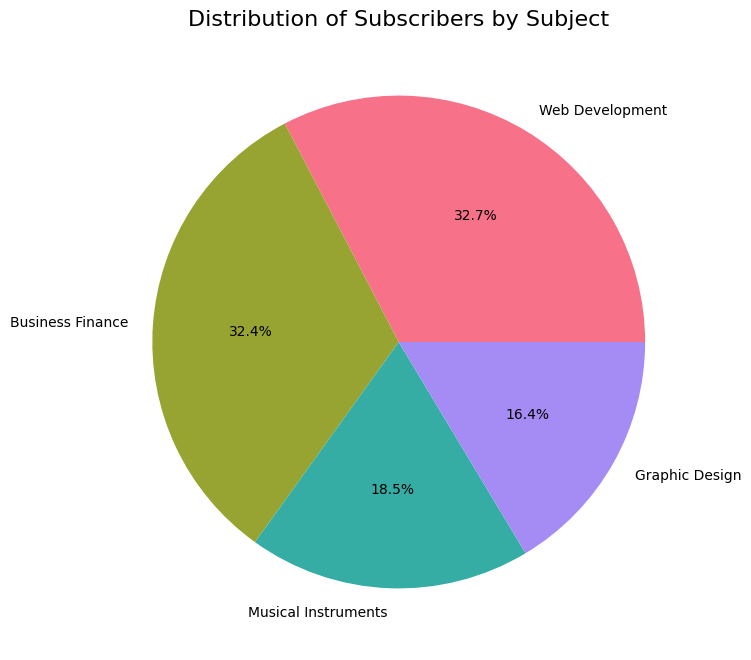

In [35]:
plt.figure(figsize= (8, 8))
plt.pie(sizes, labels= labels, autopct= '%1.1f%%', colors= custom_palette)
plt.title('Distribution of Subscribers by Subject', fontsize= 16)

plt.show()

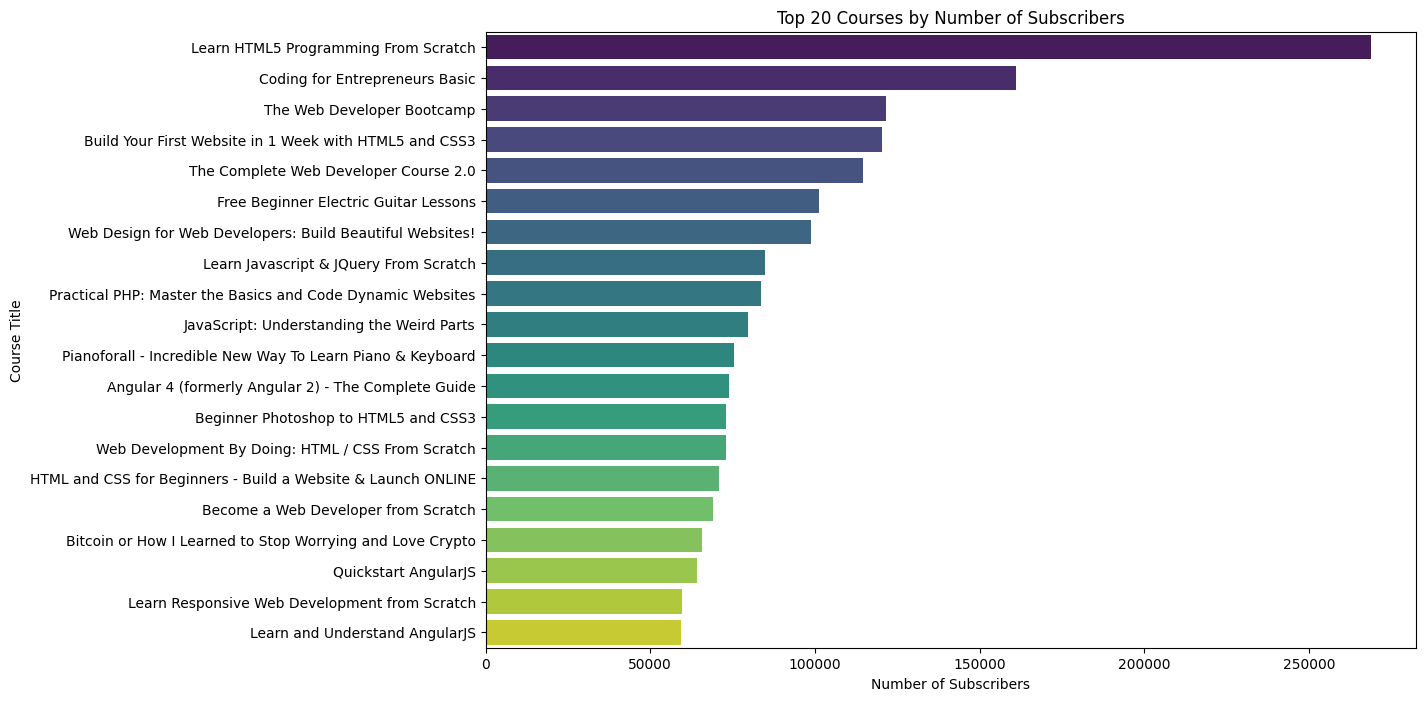

In [40]:
top_courses = df.nlargest(20, 'num_subscribers')

plt.figure(figsize=(12, 8))
sns.barplot(x='num_subscribers', y='course_title', data=top_courses, palette='viridis')
plt.title('Top 20 Courses by Number of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.show()

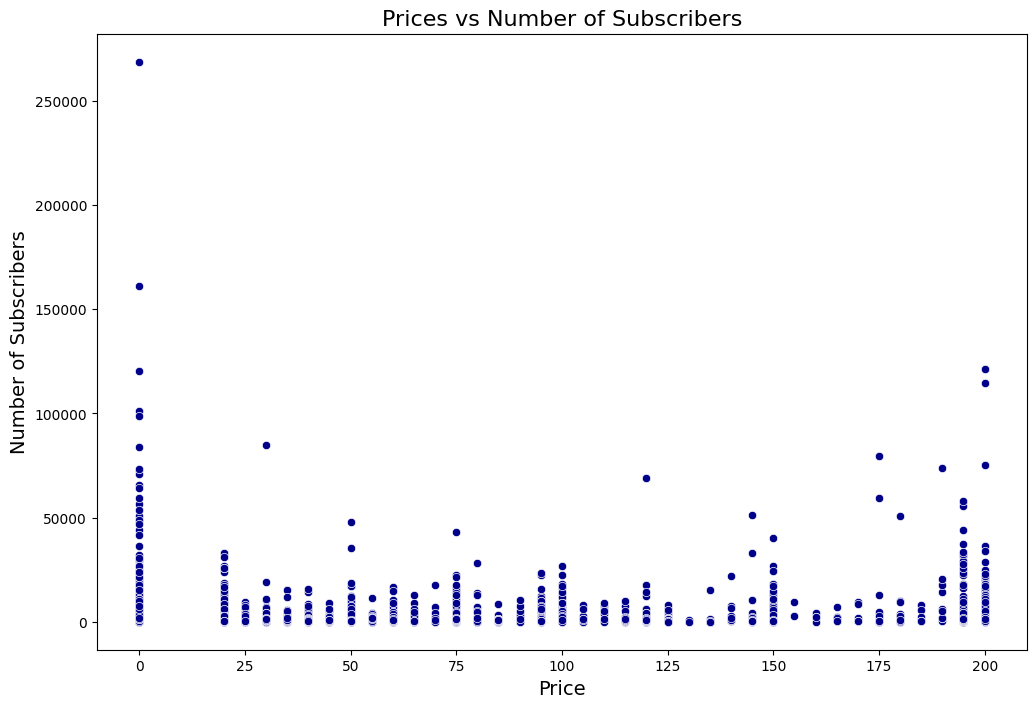

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='num_subscribers', data=df, color='darkblue')
plt.title('Prices vs Number of Subscribers', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Subscribers', fontsize=14)
plt.show()

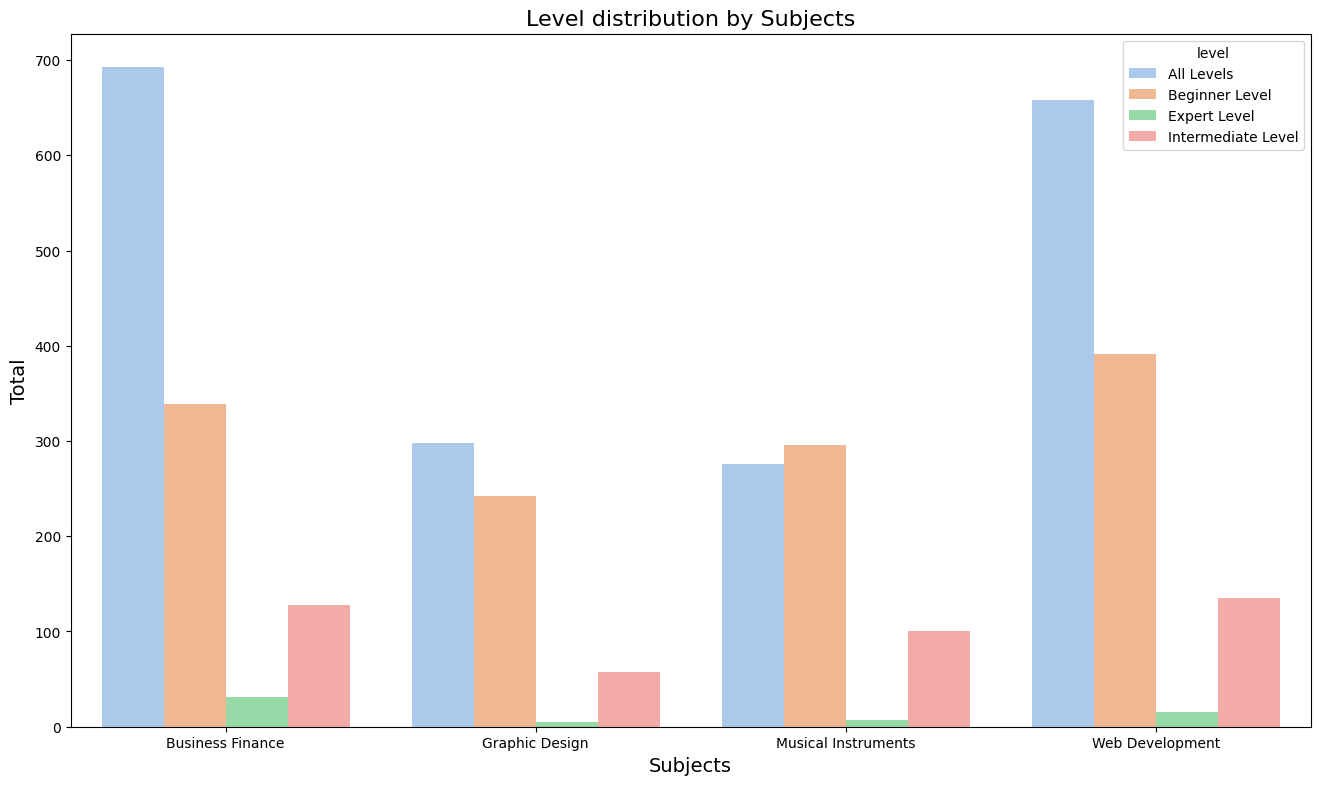

In [30]:
plt.figure(figsize = (16,9))
sns.barplot(data = dfsub, x ='subject', y ='price', hue ='level', palette ='pastel')

plt.title('Level distribution by Subjects', fontsize =16)
plt.ylabel('Total',fontsize =14)
plt.xlabel('Subjects',fontsize =14);

plt.show()

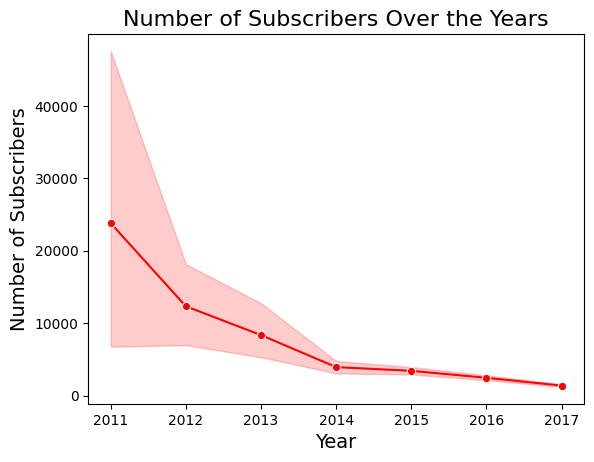

In [31]:
sns.lineplot(data= df, x= 'year', y= 'num_subscribers', marker= 'o', color= 'red')
plt.title('Number of Subscribers Over the Years', fontsize= 16)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Number of Subscribers', fontsize= 14)

plt.show()

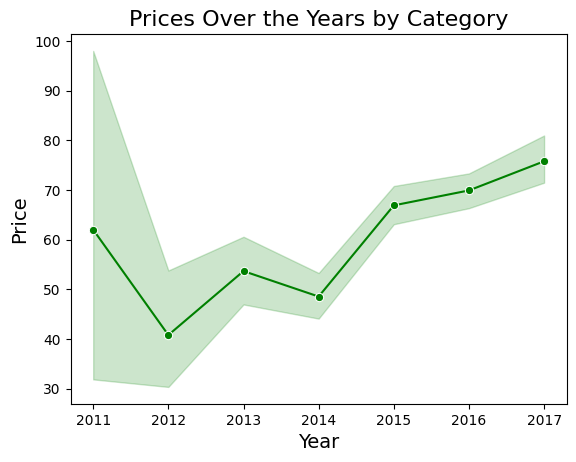

In [32]:
sns.lineplot(data=df, x='year', y='price', marker='o', color='green')
plt.title('Prices Over the Years by Category', fontsize= 16)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Price', fontsize= 14)

plt.show()

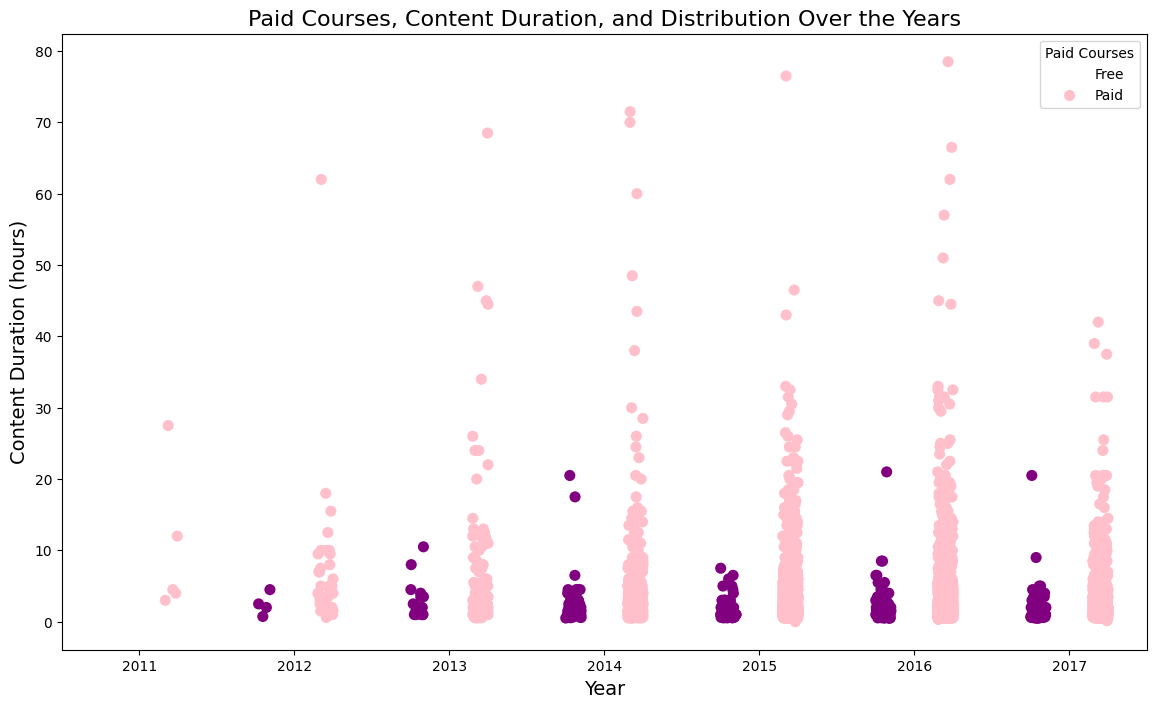

In [37]:
plt.figure(figsize=(14, 8))
sns.stripplot(data=df, x='year', y='content_duration', hue='is_paid', palette=['purple', 'pink'], size=8, jitter=True, dodge=True)
plt.title('Paid Courses, Content Duration, and Distribution Over the Years', fontsize= 16)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Content Duration (hours)', fontsize= 14)
plt.legend(title='Paid Courses', labels=['Free', 'Paid'])
plt.show()

**DISCUSSIONS AND INSIGHT**

The pie chart illustrates the distribution of subscribers by subjects. Based on it, Web development has the highest demand, followed by Business finance. Both of the subjects are the leading categories and each contributing to almost one-third of the total courses. This suggest that the courses have an increasing importance of web-related skills and financial knowledge. The subject distribution suggest that subscribers have a diverse range of intrest and learners are not concentrated on one specific domain on the Udemy platform. Musical instrument and Graphic design have a lower portion of subscribers, however, still represents a significant portion. Content creators may consider developing courses that align with intrest and preference of the majority. Adaptation to trends are crucial and course should be updated regularly to import user satisfaction.

The scatterplot provides a visual representation of the correlation between proces and number of subscribers. The data point at the price of 0 indicate free courses, which have the highest number of subscribers. This aligns with the common trend across online platforms, where free courses attract larger audience, making them an effective entry point for learners. The 2nd highest data point is at the price of 200, which suggest that courses with premium prices also have a large number of subscribers. It contradicts the notion that higher prices may deter learners. It may also indicate that certain courses, possibly advance or specialize content can attract a significant number of audience that is willing to invest in quality education. Offering a mix of free courses for broad accessibility and premium courses for in depth learning could be a effective strategy.

The barplot illutrates the distribution of courses across different levels (beginner, intermediate and expert) for various subjects, highlighting popularity and expertise levels. The beginner level for all subject are reletively higher than the other levels, which indicates a high deman for entry level content in all subjects. The popularity for intermediate level declines with all subjects. It possibly indicating that learners either progress to advance topics of choose a specialized area. For business level for all subjects is the lowest, maybe due to the complexity of the content which attracts a lower number of audience. Creators and educators can use this information to tailot course content based on the popilarity of subject at different levels. Market strategies can be adjusted to target specific audience interested in beginner, intermediate or expert level courses.

**CONCLUSIONS**

The analysis of Udemy's course data provides valuble insight for stakeholders, guiding strategic decisions and future developments. The plot revealed that majority of subscribers prefered Web development and Business finance courses. Stakeholders should continue supporting these courses while exploring opportunities to enhance subject offerings. Stakeholders also need to review and optimize the pricing strategies to increase the number of subscribers. The declining of overall subscribers over the years should prompt stakeholders to reevaluate user engagement strategies. Having a deeper understanding of the declining trend and adressing them is crucial for sustaining and growing Udemy. Stakeholders can also further explore and invest in specialized paid courses to attract a wider range of learners. Since free courses always have a higher subscribers, stakeholders may consider optimizing and promoting free courses to enhance user engagement.

In conclusion, Stakeholders are encourage to use the insights gained from this analysis to inform a decision making processes. Udemy's commitment to course quality, strategic pricing and adaptability to changing market dynamics is crucial for maintaining a strong position in the online learning industry.